In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
retail=pd.read_excel("D:/capstone/project 3/retailcap/retail.xlsx")

In [3]:
retail

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
retail.shape

(541909, 8)

In [5]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
#descriptive Analysis
retail.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
#checking for missing values
retail.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
retail.dropna(subset=['CustomerID'], inplace=True)

In [9]:
retail.dropna(subset=['Description'],inplace=True)

In [10]:
df=retail.drop_duplicates()
df.shape


(401604, 8)

In [11]:
numeric_df = df.drop(['InvoiceNo', 'InvoiceDate', 'Description', 'CustomerID', 'Country'], axis=1)

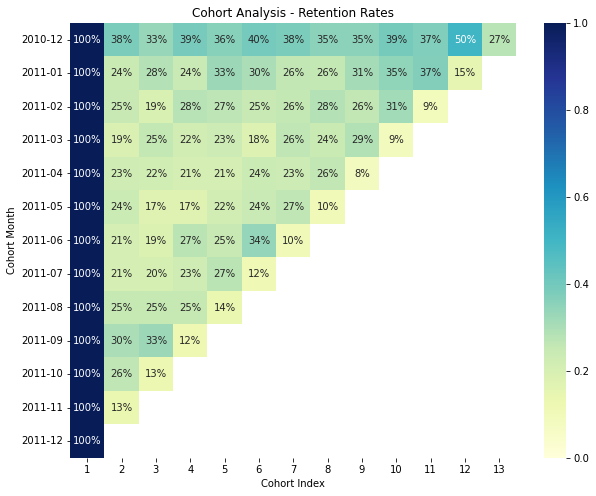

In [12]:
#coherent Analysis
# Convert InvoiceDate to datetime format
retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'])
# Extract month and year from InvoiceDate
retail['InvoiceMonth'] = retail['InvoiceDate'].dt.to_period('M')
# Get the month of the first purchase for each customer
retail['CohortMonth'] = retail.groupby('CustomerID')['InvoiceMonth'].transform('min')

# Calculate the number of months since the first purchase (cohort index)
retail['CohortIndex'] = (retail['InvoiceMonth'].dt.year - retail['CohortMonth'].dt.year) * 12 + (retail['InvoiceMonth'].dt.month - retail['CohortMonth'].dt.month) + 1

# Group the data by CohortMonth and CohortIndex
cohorts = retail.groupby(['CohortMonth', 'CohortIndex'])

# Calculate the number of unique customers in each cohort
cohort_data = cohorts['CustomerID'].nunique().reset_index()

# Create a pivot table for the cohort analysis
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')

# Calculate the retention rates
cohort_sizes = cohort_counts.iloc[:, 0]
retention = cohort_counts.divide(cohort_sizes, axis=0)

# Visualize the retention rates
plt.figure(figsize=(10, 8))
plt.title('Cohort Analysis - Retention Rates')
sns.heatmap(data=retention, annot=True, fmt='.0%', cmap='YlGnBu', vmin=0.0, vmax=1.0)
plt.xlabel('Cohort Index')
plt.ylabel('Cohort Month')
plt.show()

cohort analysis by calculating the retention rates of customers across different cohorts over time. It visualizes the retention rates using a heatmap, making it easy to observe how retention changes over time for each cohort.
 

In [22]:
# Calculate the amount for each transaction
retail['Amount'] = retail['UnitPrice'] * retail['Quantity']

# Group the data by 'CustomerID' and calculate the sum of 'Amount' for each customer
monetary_analysis = retail.groupby('CustomerID')['Amount'].sum().reset_index()

# Output the monetary analysis
print(monetary_analysis)

      CustomerID   Amount
0        12346.0     0.00
1        12347.0  4310.00
2        12348.0  1797.24
3        12349.0  1757.55
4        12350.0   334.40
...          ...      ...
4367     18280.0   180.60
4368     18281.0    80.82
4369     18282.0   176.60
4370     18283.0  2094.88
4371     18287.0  1837.28

[4372 rows x 2 columns]


In [24]:
# Calculate the number of unique invoices for each customer
frequency_analysis = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency_analysis.columns = ['CustomerID', 'Frequency']

# Output the frequency analysis
print("Frequency analysis:")
print(frequency_analysis)

Frequency analysis:
      CustomerID  Frequency
0        12346.0          2
1        12347.0          7
2        12348.0          4
3        12349.0          1
4        12350.0          1
...          ...        ...
4367     18280.0          1
4368     18281.0          1
4369     18282.0          3
4370     18283.0         16
4371     18287.0          3

[4372 rows x 2 columns]


In [31]:
#We will fix reference date for calculating recency as last transaction day in data + 1 day
from datetime import timedelta
ref_day = max(df['InvoiceDate']) + timedelta(days=1)
df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days
df.head()

C:\Users\kasireddy madhavi\AppData\Local\Temp\ipykernel_18204\2608325862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['days_to_last_order'] = (ref_day - df['InvoiceDate']).dt.days


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Recency,days_to_last_order
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,NaT,374
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaT,374
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,NaT,374
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaT,374
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,NaT,374


In [32]:
df_recency = df.groupby('CustomerID')['days_to_last_order'].min().reset_index()
df_recency

,CustomerID,days_to_last_order
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310
...,...,...
4367,18280.0,278
4368,18281.0,181
4369,18282.0,8
4370,18283.0,4


In [34]:
df_rf = pd.merge(df_recency,frequency_analysis,  on='CustomerID', how='inner')
df_rfm = pd.merge(df_rf, monetary_analysis, on='CustomerID', how='inner')
df_rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,326,2,0.00
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,19,1,1757.55
4,12350.0,310,1,334.40


In [35]:
# Step 1: Calculate RFM metrics
# Assume df_rfm contains CustomerID, Recency, Frequency, and Monetary columns

# Step 2: Divide each metric into quartiles and assign scores
recency_quartiles = df_rfm['Recency'].quantile([0.25, 0.5, 0.75])
frequency_quartiles = df_rfm['Frequency'].quantile([0.25, 0.5, 0.75])
monetary_quartiles = df_rfm['Monetary'].quantile([0.25, 0.5, 0.75])

def assign_recency_score(recency):
    if recency <= recency_quartiles[0.25]:
        return 4
    elif recency <= recency_quartiles[0.5]:
        return 3
    elif recency <= recency_quartiles[0.75]:
        return 2
    else:
        return 1

def assign_frequency_score(frequency):
    if frequency <= frequency_quartiles[0.25]:
        return 1
    elif frequency <= frequency_quartiles[0.5]:
        return 2
    elif frequency <= frequency_quartiles[0.75]:
        return 3
    else:
        return 4

def assign_monetary_score(monetary):
    if monetary <= monetary_quartiles[0.25]:
        return 1
    elif monetary <= monetary_quartiles[0.5]:
        return 2
    elif monetary <= monetary_quartiles[0.75]:
        return 3
    else:
        return 4

# Step 3: Combine scores to create RFM segments
df_rfm['R'] = df_rfm['Recency'].apply(assign_recency_score)
df_rfm['F'] = df_rfm['Frequency'].apply(assign_frequency_score)
df_rfm['M'] = df_rfm['Monetary'].apply(assign_monetary_score)
df_rfm['RFM_Segment'] = df_rfm['R'].astype(str) + df_rfm['F'].astype(str) + df_rfm['M'].astype(str)

# Step 4: Calculate RFM score for each customer
df_rfm['RFM_Score'] = df_rfm['R'] + df_rfm['F'] + df_rfm['M']

# Analyze the RFM segments by summarizing them
rfm_segment_summary = df_rfm.groupby('RFM_Segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'RFM_Score': 'count'
}).reset_index()

# Output the RFM segment summary
print(rfm_segment_summary)


   RFM_Segment     Recency  Frequency     Monetary  RFM_Score
0          111  271.081886   1.000000   119.840099        403
1          112  261.872340   1.000000   404.091436        188
2          113  244.533333   1.000000   945.711667         30
3          114  254.444444   1.000000  2073.327778          9
4          121  233.672414   2.189655   169.378534        116
..         ...         ...        ...          ...        ...
58         434    7.071429   4.642857  2559.117500         56
59         441   12.000000   8.000000   191.170000          1
60         442    8.375000   7.500000   505.977500          8
61         443    7.857143   7.734694  1224.665306         98
62         444    6.847390  18.819277  8780.148876        498

[63 rows x 5 columns]


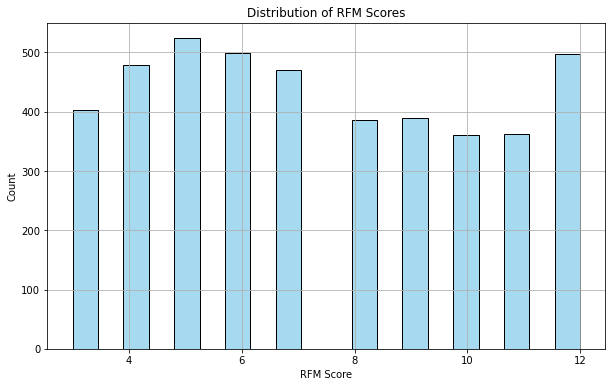

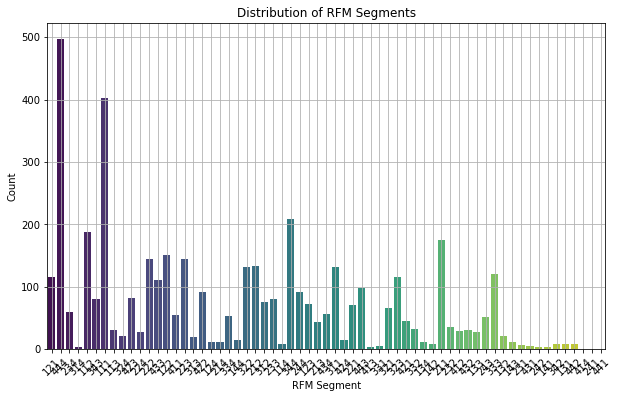

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot RFM Scores
plt.figure(figsize=(10, 6))
sns.histplot(df_rfm['RFM_Score'], bins=20, kde=False, color='skyblue')
plt.title('Distribution of RFM Scores')
plt.xlabel('RFM Score')
plt.ylabel('Count')
plt.grid(True)
plt.show()

# Plot RFM Segments
plt.figure(figsize=(10, 6))
sns.countplot(x='RFM_Segment', data=df_rfm, palette='viridis')
plt.title('Distribution of RFM Segments')
plt.xlabel('RFM Segment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


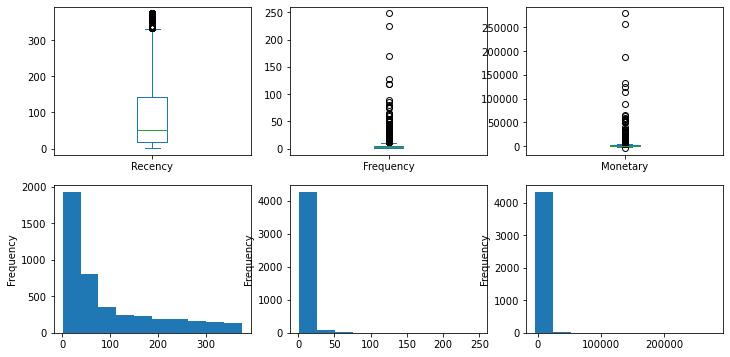

In [37]:
plt.figure(figsize=(12,6))

for i, feature in enumerate(['Recency', 'Frequency', 'Monetary']):
    plt.subplot(2,3,i+1)
    df_rfm[feature].plot(kind='box')
    plt.subplot(2,3,i+1+3)
    df_rfm[feature].plot(kind='hist')

**Log Transformation:** Now since all three features have right skewed data therefore we will use log transformation of these features in our model.


In [38]:
df_rfm_log_trans = pd.DataFrame()
df_rfm_log_trans['Recency'] = np.log(df_rfm['Recency'])
df_rfm_log_trans['Frequency'] = np.log(df_rfm['Frequency'])
df_rfm_log_trans['Monetary'] = np.log(df_rfm['Monetary']-df_rfm['Monetary'].min()+1)

**Standard Scalar Transformation:** It is extremely important to rescale the features so that they have a comparable scale.

In [39]:
scaler = StandardScaler()

df_rfm_scaled = scaler.fit_transform(df_rfm_log_trans[['Recency', 'Frequency', 'Monetary']])
df_rfm_scaled

df_rfm_scaled = pd.DataFrame(df_rfm_scaled)
df_rfm_scaled.columns = ['Recency', 'Frequency', 'Monetary']
df_rfm_scaled.head()

,Recency,Frequency,Monetary
0,1.402917,-0.395992,-0.694689
1,-2.075135,0.917477,1.216783
2,0.399593,0.330743,0.267050
3,-0.537936,-1.122728,0.249071
4,1.368554,-1.122728,-0.488376


In [42]:
# k-means with some arbitrary k
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [43]:
kmeans.labels_

array([1, 2, 0, ..., 0, 0, 0])

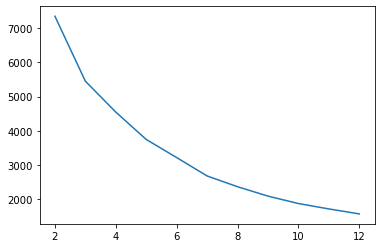

In [44]:
# Finding the Optimal Number of Clusters with the help of Elbow Curve/ SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=100)
    kmeans.fit(df_rfm_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(range_n_clusters,ssd);

In [46]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df_rfm_scaled)

KMeans(max_iter=50, n_clusters=3)

In [47]:
# assign the label
df_rfm['Cluster_Id'] = kmeans.labels_
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Cluster_Id
0,12346.0,326,2,0.00,1,2,1,121,4,0
1,12347.0,2,7,4310.00,4,4,4,444,12,1
2,12348.0,75,4,1797.24,2,3,4,234,9,2
3,12349.0,19,1,1757.55,3,1,4,314,8,0
4,12350.0,310,1,334.40,1,1,2,112,4,0
